# Data Collection

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

df=pd.read_csv('dataset.csv')

df

,Timestamp,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals,Satisfication
0,31/10/2023 12:13:19,cs21b1085@iiitdm.ac.in,Male,1,1,No,No,2,3,Maybe,3
1,31/10/2023 12:26:47,cs21b1019@iiitdm.ac.in,Male,0,1,No,Yes,3,3,Yes,3
2,31/10/2023 12:26:49,cs21b1034@iiitdm.ac.in,Male,0,1,Yes,Yes,3,2,Maybe,1
3,31/10/2023 12:26:52,cs21b1033@iiitdm.ac.in,Male,2,>=3,Yes,Yes,4,4,Yes,3
4,31/10/2023 12:29:00,vishnubollineni.123@gmail.com,Male,>=3,>=3,Yes,Yes,5,5,Yes,5
...,...,...,...,...,...,...,...,...,...,...,...
121,03/11/2023 23:31:03,abhinandanyv777@gmail.com,Male,0,1,Yes,Yes,3,4,Maybe,3
122,04/11/2023 10:25:59,cs21b1025@iiitdm.ac.in,Male,>=3,0,Yes,No,3,5,Maybe,1
123,04/11/2023 09:40:34,cs21b1085@iiitdm.ac.in,Male,1,1,No,Yes,3,3,No,4
124,04/11/2023 09:41:34,cs21b1033@iiitdm.ac.in,Male,1,2,No,Yes,3,4,Yes,5


## Data Cleaning

In [2]:
#Data cleaning

#1.Remove Duplications

df.drop_duplicates(subset="Mail", keep="last",inplace=True)

df.reset_index(drop=True,inplace=True)

#2.Removing unnecessary columns

df.drop(columns=['Timestamp','Satisfication'], inplace=True)

df

,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals
0,cs21b1019@iiitdm.ac.in,Male,0,1,No,Yes,3,3,Yes
1,cs21b1034@iiitdm.ac.in,Male,0,1,Yes,Yes,3,2,Maybe
2,vishnubollineni.123@gmail.com,Male,>=3,>=3,Yes,Yes,5,5,Yes
3,mohithsai04.b@gmail.com,Male,>=3,0,Yes,No,4,3,Maybe
4,obsoletefire732@gmail.com,Male,>=3,1,No,Yes,5,5,Maybe
...,...,...,...,...,...,...,...,...,...
116,abhinandanyv777@gmail.com,Male,0,1,Yes,Yes,3,4,Maybe
117,cs21b1025@iiitdm.ac.in,Male,>=3,0,Yes,No,3,5,Maybe
118,cs21b1085@iiitdm.ac.in,Male,1,1,No,Yes,3,3,No
119,cs21b1033@iiitdm.ac.in,Male,1,2,No,Yes,3,4,Yes


In [3]:
#3.Handling inconsistent data

df['Clubs']=df['Clubs'].replace(">=3","4")
df['Sports']=df['Sports'].replace(">=3","4")

df['Clubs']=df['Clubs'].astype(int)
df['Sports']=df['Sports'].astype(int)


for index, row in df.iterrows():
    if row['Clubs'] == 0 and row['Sports'] == 0:
        if row['Impact'] > 1:
            df.at[index, 'Impact'] = 1
        if row['Balance'] > 1:
            df.at[index, 'Balance'] = 1
        if row['Career Goals']!='No' :
            df.at[index, 'Career Goals'] = 'No'

df

,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals
0,cs21b1019@iiitdm.ac.in,Male,0,1,No,Yes,3,3,Yes
1,cs21b1034@iiitdm.ac.in,Male,0,1,Yes,Yes,3,2,Maybe
2,vishnubollineni.123@gmail.com,Male,4,4,Yes,Yes,5,5,Yes
3,mohithsai04.b@gmail.com,Male,4,0,Yes,No,4,3,Maybe
4,obsoletefire732@gmail.com,Male,4,1,No,Yes,5,5,Maybe
...,...,...,...,...,...,...,...,...,...
116,abhinandanyv777@gmail.com,Male,0,1,Yes,Yes,3,4,Maybe
117,cs21b1025@iiitdm.ac.in,Male,4,0,Yes,No,3,5,Maybe
118,cs21b1085@iiitdm.ac.in,Male,1,1,No,Yes,3,3,No
119,cs21b1033@iiitdm.ac.in,Male,1,2,No,Yes,3,4,Yes


In [4]:
df.head()

,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals
0,cs21b1019@iiitdm.ac.in,Male,0,1,No,Yes,3,3,Yes
1,cs21b1034@iiitdm.ac.in,Male,0,1,Yes,Yes,3,2,Maybe
2,vishnubollineni.123@gmail.com,Male,4,4,Yes,Yes,5,5,Yes
3,mohithsai04.b@gmail.com,Male,4,0,Yes,No,4,3,Maybe
4,obsoletefire732@gmail.com,Male,4,1,No,Yes,5,5,Maybe


In [5]:
#Handling missing Values

df.isnull().sum()

Mail            0
Gender          0
Clubs           0
Sports          0
Leadership      0
Awards          3
Balance         0
Impact          0
Career Goals    0
dtype: int64

In [8]:
df['Awards'].fillna("df['Awards'].mode()" ,inplace=True)

# df.mode()


In [9]:
df.isnull().sum()

Mail            0
Gender          0
Clubs           0
Sports          0
Leadership      0
Awards          0
Balance         0
Impact          0
Career Goals    0
dtype: int64

 # Outlier Detection

# BoxPlot

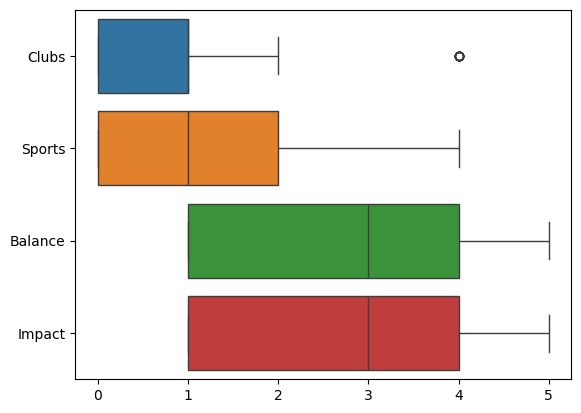

In [10]:
#outlier detection boxplot

sns.boxplot(data=df, orient="h")
plt.show()

# Histogram

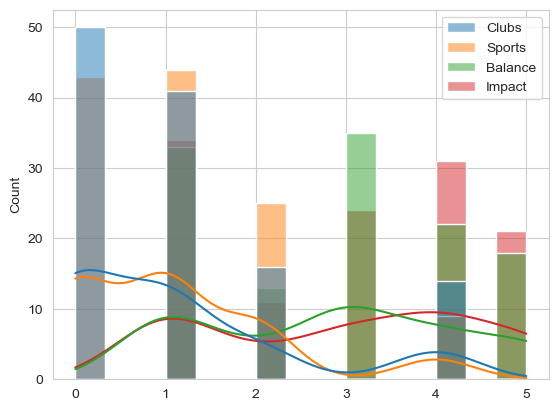

In [11]:
#Histogram calculation for outliers

sns.set_style('whitegrid')  
sns.histplot(data=df, kde=True,bins=15)  
plt.show()

# Scatter plot

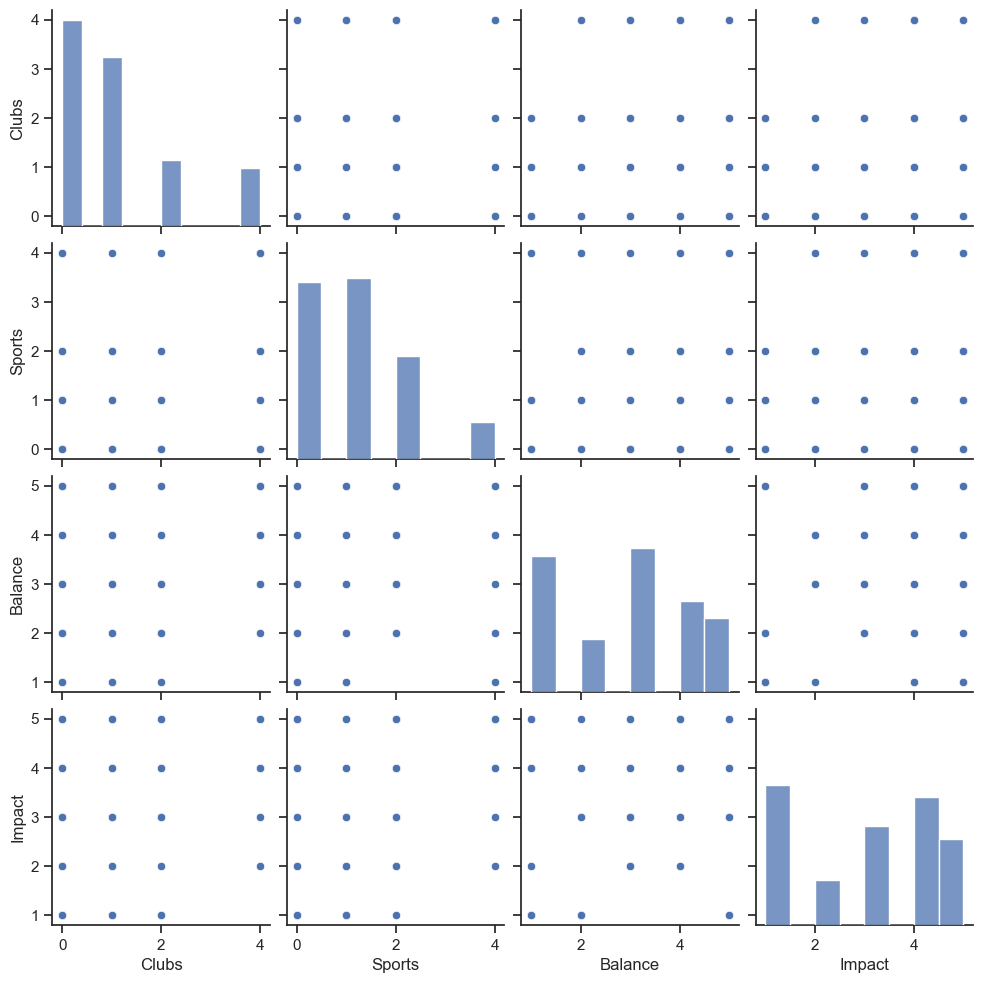

In [12]:
#Scatter plot

sns.set(style="ticks")
sns.pairplot(df, kind="scatter")
plt.show()

# Data Transformation

# Removing Outliers

In [13]:
# Removing outliers(Data Smoothing)

q1 = df['Clubs'].quantile(0.25)
q2 = df['Clubs'].quantile(0.75)
IQR = q2 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q2 + 1.5 * IQR

df = df[(df['Clubs'] >= lower_bound) & (df['Clubs'] <= upper_bound)]

df.reset_index(drop=True,inplace=True)

df

,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals
0,cs21b1019@iiitdm.ac.in,Male,0,1,No,Yes,3,3,Yes
1,cs21b1034@iiitdm.ac.in,Male,0,1,Yes,Yes,3,2,Maybe
2,cs21b1084@iiitdm.ac.in,Male,2,0,Yes,No,2,4,Maybe
3,nissieprashamsa@gmail.com,Female,0,0,No,No,1,1,No
4,ec21b1085@iiitdm.ac.in,Male,0,1,Yes,df['Awards'].mode(),3,3,Maybe
...,...,...,...,...,...,...,...,...,...
102,anilkumar.tenali194@gmail.com,Male,1,2,No,Yes,3,2,No
103,abhinandanyv777@gmail.com,Male,0,1,Yes,Yes,3,4,Maybe
104,cs21b1085@iiitdm.ac.in,Male,1,1,No,Yes,3,3,No
105,cs21b1033@iiitdm.ac.in,Male,1,2,No,Yes,3,4,Yes


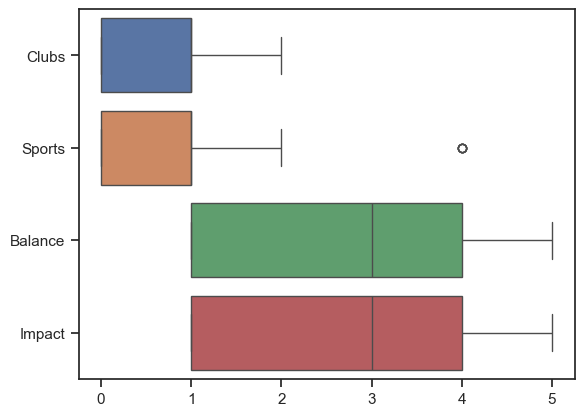

In [14]:
#outlier detection boxplot

sns.boxplot(data=df, orient="h")
plt.show()

In [15]:
# Removing outliers(Data Smoothing)

q1 = df['Sports'].quantile(0.25)
q2 = df['Sports'].quantile(0.75)
IQR = q2 - q1

lower_bound = q1 - 1.5 * IQR
upper_bound = q2 + 1.5 * IQR

df = df[(df['Sports'] >= lower_bound) & (df['Sports'] <= upper_bound)]

df.reset_index(drop=True,inplace=True)

df

,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals
0,cs21b1019@iiitdm.ac.in,Male,0,1,No,Yes,3,3,Yes
1,cs21b1034@iiitdm.ac.in,Male,0,1,Yes,Yes,3,2,Maybe
2,cs21b1084@iiitdm.ac.in,Male,2,0,Yes,No,2,4,Maybe
3,nissieprashamsa@gmail.com,Female,0,0,No,No,1,1,No
4,ec21b1085@iiitdm.ac.in,Male,0,1,Yes,df['Awards'].mode(),3,3,Maybe
...,...,...,...,...,...,...,...,...,...
97,anilkumar.tenali194@gmail.com,Male,1,2,No,Yes,3,2,No
98,abhinandanyv777@gmail.com,Male,0,1,Yes,Yes,3,4,Maybe
99,cs21b1085@iiitdm.ac.in,Male,1,1,No,Yes,3,3,No
100,cs21b1033@iiitdm.ac.in,Male,1,2,No,Yes,3,4,Yes


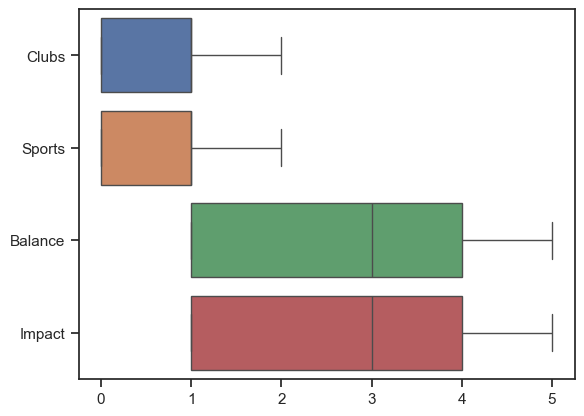

In [16]:
#outlier detection boxplot

sns.boxplot(data=df, orient="h")
plt.show()

# Data Normalization(Z Score Normalization or Standardization)

In [17]:
#Data Normalization(Z Score Normalization or Standardization)

scaler = StandardScaler()

pd.options.mode.chained_assignment = None

col_list = ['Clubs', 'Sports','Balance','Impact']

df[['Clubs', 'Sports','Balance','Impact']] = scaler.fit_transform(df[['Clubs', 'Sports','Balance','Impact']])

df

,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals
0,cs21b1019@iiitdm.ac.in,Male,-0.961524,0.264443,No,Yes,0.241287,0.166559,Yes
1,cs21b1034@iiitdm.ac.in,Male,-0.961524,0.264443,Yes,Yes,0.241287,-0.513003,Maybe
2,cs21b1084@iiitdm.ac.in,Male,1.840632,-1.084216,Yes,No,-0.482573,0.846122,Maybe
3,nissieprashamsa@gmail.com,Female,-0.961524,-1.084216,No,No,-1.206433,-1.192565,No
4,ec21b1085@iiitdm.ac.in,Male,-0.961524,0.264443,Yes,df['Awards'].mode(),0.241287,0.166559,Maybe
...,...,...,...,...,...,...,...,...,...
97,anilkumar.tenali194@gmail.com,Male,0.439554,1.613102,No,Yes,0.241287,-0.513003,No
98,abhinandanyv777@gmail.com,Male,-0.961524,0.264443,Yes,Yes,0.241287,0.846122,Maybe
99,cs21b1085@iiitdm.ac.in,Male,0.439554,0.264443,No,Yes,0.241287,0.166559,No
100,cs21b1033@iiitdm.ac.in,Male,0.439554,1.613102,No,Yes,0.241287,0.846122,Yes


In [18]:
df['Career Goals']=df['Career Goals'].replace('Yes',1)
df['Career Goals']=df['Career Goals'].replace('No',2)
df['Career Goals']=df['Career Goals'].replace('Maybe',3)

df

,Mail,Gender,Clubs,Sports,Leadership,Awards,Balance,Impact,Career Goals
0,cs21b1019@iiitdm.ac.in,Male,-0.961524,0.264443,No,Yes,0.241287,0.166559,1
1,cs21b1034@iiitdm.ac.in,Male,-0.961524,0.264443,Yes,Yes,0.241287,-0.513003,3
2,cs21b1084@iiitdm.ac.in,Male,1.840632,-1.084216,Yes,No,-0.482573,0.846122,3
3,nissieprashamsa@gmail.com,Female,-0.961524,-1.084216,No,No,-1.206433,-1.192565,2
4,ec21b1085@iiitdm.ac.in,Male,-0.961524,0.264443,Yes,df['Awards'].mode(),0.241287,0.166559,3
...,...,...,...,...,...,...,...,...,...
97,anilkumar.tenali194@gmail.com,Male,0.439554,1.613102,No,Yes,0.241287,-0.513003,2
98,abhinandanyv777@gmail.com,Male,-0.961524,0.264443,Yes,Yes,0.241287,0.846122,3
99,cs21b1085@iiitdm.ac.in,Male,0.439554,0.264443,No,Yes,0.241287,0.166559,2
100,cs21b1033@iiitdm.ac.in,Male,0.439554,1.613102,No,Yes,0.241287,0.846122,1


# Corelation Analysis

In [19]:
#Corelation Analysis

cor_mat=df.corr(numeric_only=True)

cor_mat

,Clubs,Sports,Balance,Impact,Career Goals
Clubs,1.000000,0.217218,0.391090,0.496193,-0.109253
Sports,0.217218,1.000000,0.558307,0.369277,-0.081217
Balance,0.391090,0.558307,1.000000,0.678382,-0.142510
Impact,0.496193,0.369277,0.678382,1.000000,-0.149266
Career Goals,-0.109253,-0.081217,-0.142510,-0.149266,1.000000


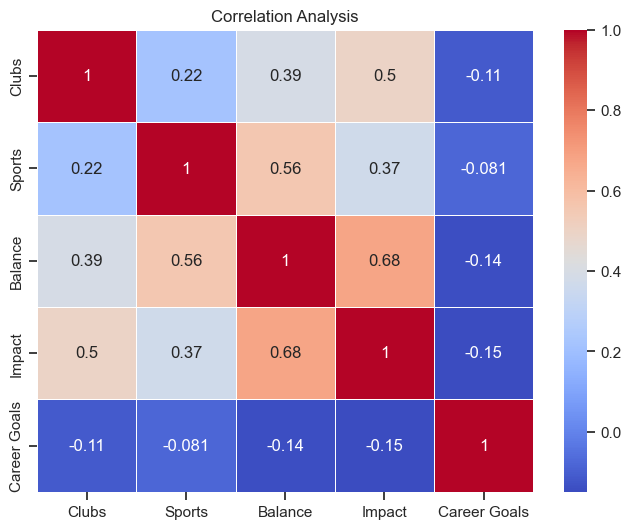

In [20]:
# Create a heatmap of the correlation matrix

plt.figure(figsize=(8, 6))
sns.heatmap(cor_mat, annot=True, cmap='coolwarm', linewidths=.5)
plt.title("Correlation Analysis")
plt.show()

# Data Reduction

# PCA

In [21]:
#PCA(Principal Component Analysis)

from sklearn.decomposition import PCA

X = df[['Clubs', 'Sports', 'Balance', 'Impact']]

# Initialize the PCA object
pca = PCA(n_components=2)

# Fit and transform the data using PCA
X_pca = pca.fit_transform(X)

# Create a DataFrame for the PCA results
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])

print(pca_df)

# Print the explained variance ratio to understand how much variance is explained by each principal component
print("Explained Variance Ratios:", pca.explained_variance_ratio_)

          PC1       PC2
0   -0.064655 -0.852914
1   -0.437488 -0.989973
2    0.495705  2.257761
3   -2.227888  0.053099
4   -0.064655 -0.852914
..        ...       ...
97   0.755789 -0.924300
98   0.308178 -0.715855
99   0.532524  0.113641
100  1.501456 -0.650182
101 -0.026697  0.945702

[102 rows x 2 columns]
Explained Variance Ratios: [0.59614774 0.2063469 ]


# PCA plot

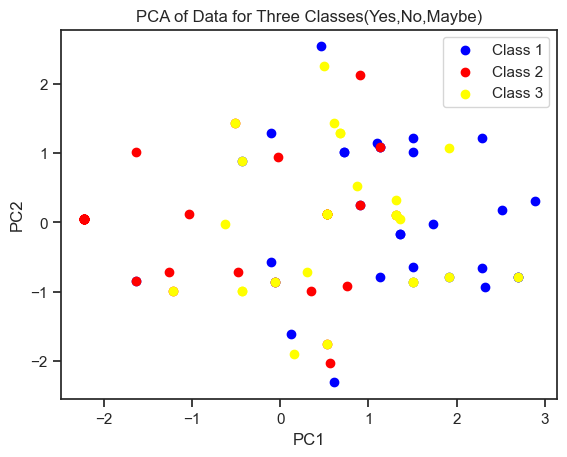

In [22]:
# Assuming 'Class' is the column that represents your two classes
class_labels = df['Career Goals']

# Add the class labels to the PCA DataFrame
pca_df['Class'] = class_labels

# Separate the data for each class
class_1 = pca_df[ df['Career Goals'] == 1]
class_2 = pca_df[ df['Career Goals'] == 2]
class_3=pca_df[ df['Career Goals'] == 3]

# Create a scatter plot for class 1
plt.scatter(class_1['PC1'], class_1['PC2'], label='Class 1', c='blue')

# Create a scatter plot for class 2
plt.scatter(class_2['PC1'], class_2['PC2'], label='Class 2', c='red')

# Create a scatter plot for class 3
plt.scatter(class_3['PC1'], class_3['PC2'], label='Class 3', c='yellow')

plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.title('PCA of Data for Three Classes(Yes,No,Maybe)')
plt.show()

# LDA

In [23]:
#LDA(Linear Discriminant Analysis)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Example DataFrame (replace this with your DataFrame)
# Assume X is your data, and y is the target variable
X = df[['Clubs', 'Sports', 'Balance', 'Impact']]
y = df['Career Goals']  # Assuming 'Career Goals' is the target variable

# Initialize the LDA object
lda = LinearDiscriminantAnalysis()

# Fit and transform the data using LDA
X_lda = lda.fit_transform(X, y)

# Create a DataFrame for the LDA results
lda_df = pd.DataFrame(data=X_lda, columns=['LD1', 'LD2'])

# Print the DataFrame with LDA results
print(lda_df)

          LD1       LD2
0    0.074423  0.851377
1   -0.367910  0.949706
2    0.499181 -2.297847
3   -1.922464 -0.159638
4    0.074423  0.851377
..        ...       ...
97   0.205342  1.181246
98   0.516755  0.753049
99   0.404487 -0.081138
100  1.090007  0.984589
101 -0.584630 -0.838805

[102 rows x 2 columns]


# LDA Plot

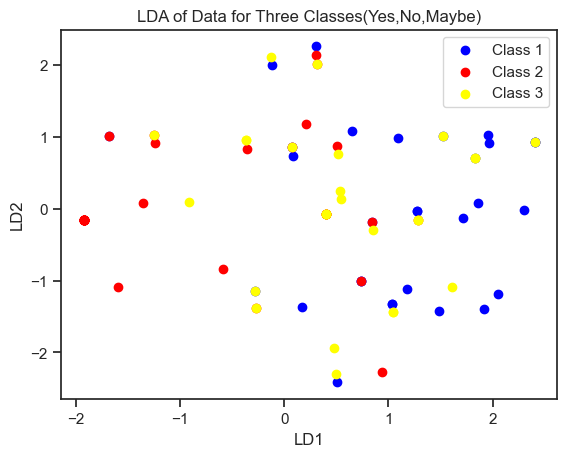

In [24]:

# Assuming 'Career Goals' contains the class labels
class_labels = df['Career Goals']

# Add the class labels to the LDA DataFrame
lda_df['Career Goals'] = class_labels

# Create separate DataFrames for each class
class_1 = lda_df[lda_df['Career Goals'] == 1]
class_2 = lda_df[lda_df['Career Goals'] == 2]
class_3 = lda_df[lda_df['Career Goals'] == 3]

# Create a scatter plot for class 1
plt.scatter(class_1['LD1'], class_1['LD2'], label='Class 1', c='blue')

# Create a scatter plot for class 2
plt.scatter(class_2['LD1'], class_2['LD2'], label='Class 2', c='red')

# Create a scatter plot for class 3
plt.scatter(class_3['LD1'], class_3['LD2'], label='Class 3', c='yellow')

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend()
plt.title('LDA of Data for Three Classes(Yes,No,Maybe)')
plt.show()

# Random Forest Classifier
As PCA and LDA can't able to differentiate the overall 3 clusters(classes) using Random Forest classifer predicting overall Accuracy

In [25]:
#Accurary

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the PCA data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(pca_df, class_labels, test_size=0.4, random_state=42)

# Initialize the Random Forest classifier
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_classifier_pca.fit(X_train_pca, y_train_pca)

# Make predictions on the test data
y_pred_pca = rf_classifier_pca.predict(X_test_pca)

# Calculate accuracy
accuracy_pca = accuracy_score(y_test_pca, y_pred_pca)
acc=accuracy_pca*100
print(f'Accuracy: {acc:.2f}%')

Accuracy: 95.12%
